In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data4 = pd.read_csv("Merchant_ejercicios_apply.csv.csv", index_col = 0)
data4.head()

,title,price,retail_price,units_sold,uses_ad_boosts,rating_sold,rating_count,rating_five_count,rating_four_count,rating_three_count,...,listed_products,total_units_sold,mean_units_sold_per_product,rating_employee,merchant_ratings_count,mean_product_prices,mean_retail_prices,mean_product_ratings_count,discount_percentage,seller_reputation
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,100,No,3.76,54,26.0,8.0,10.0,...,1,100,100.0,4.129,568.0,16.00,14.00,54.0,14.29,Buena
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,8.00,22,20000,Si,3.45,6135,2269.0,1027.0,1118.0,...,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-63.64,Regular
2,Nouvelle mode d'été femmes robe décontractée c...,4.90,8,1000,Si,3.83,99,43.0,18.0,23.0,...,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-38.75,Regular
3,Summer Women s Fashion Lace Up Tie Pants Plus...,4.93,6,100,No,3.77,47,22.0,7.0,8.0,...,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-17.83,Regular
4,Nouvelle mode d'été femmes robe décontractée c...,5.65,10,100,Si,2.86,7,1.0,1.0,2.0,...,6,21400,3567.0,3.900,17752.0,5.68,10.33,1057.0,-43.50,Regular


In [9]:
nulos = data4.isnull().sum()
nulos

title                            0
price                            0
retail_price                     0
units_sold                       0
uses_ad_boosts                   0
rating_sold                      0
rating_count                     0
rating_five_count               45
rating_four_count               45
rating_three_count              45
rating_two_count                45
rating_one_count                45
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
tags                             0
product_color                   41
product_variation_size_id       14
shipping_option_name             0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
origin_country                  17
merchant_name                    4
merchant_info_subtitle         294
merchant_rating_count            0
merchant_id                      0
product_url         

In [10]:
data4.shape[0]

1573

In [11]:
nulos = data4.isnull().sum()/data4.shape[0]*100
# % nulos ordenados de mayor a menor
nulos.sort_values(ascending=False)

merchant_info_subtitle         18.690401
rating_five_count               2.860776
rating_four_count               2.860776
rating_three_count              2.860776
rating_two_count                2.860776
rating_one_count                2.860776
product_color                   2.606484
origin_country                  1.080737
product_variation_size_id       0.890019
merchant_name                   0.254291
listed_products                 0.000000
merchant_rating_count           0.000000
merchant_id                     0.000000
product_url                     0.000000
product_id                      0.000000
title                           0.000000
total_units_sold                0.000000
mean_units_sold_per_product     0.000000
merchant_ratings_count          0.000000
mean_product_prices             0.000000
mean_retail_prices              0.000000
mean_product_ratings_count      0.000000
discount_percentage             0.000000
rating_employee                 0.000000
shipping_is_expr

In [ ]:
# ¿Qué columnas tienen nulos?

In [12]:
# nos quedamos solo con variables que tienen algún nulo
nulos = nulos[nulos > 0]
nulos.sort_values(ascending=False)

merchant_info_subtitle       18.690401
rating_five_count             2.860776
rating_four_count             2.860776
rating_three_count            2.860776
rating_two_count              2.860776
rating_one_count              2.860776
product_color                 2.606484
origin_country                1.080737
product_variation_size_id     0.890019
merchant_name                 0.254291
dtype: float64

In [ ]:
# Explorad los nulos que hay en el DataFrame.

In [13]:
nulos = nulos.to_frame(name='perc_nulos').reset_index().rename(columns={'index': 'var'})
nulos

,var,perc_nulos
0,rating_five_count,2.860776
1,rating_four_count,2.860776
2,rating_three_count,2.860776
3,rating_two_count,2.860776
4,rating_one_count,2.860776
5,product_color,2.606484
6,product_variation_size_id,0.890019
7,origin_country,1.080737
8,merchant_name,0.254291
9,merchant_info_subtitle,18.690401


In [14]:
# Separamos las variables con nulos en variables categóricas y numéricas. Pero antes, deberemos haber comprobado que su tipo de dato es correcto.
data4.dtypes

title                           object
price                          float64
retail_price                     int64
units_sold                       int64
uses_ad_boosts                  object
rating_sold                    float64
rating_count                     int64
rating_five_count              float64
rating_four_count              float64
rating_three_count             float64
rating_two_count               float64
rating_one_count               float64
badge_local_product             object
badge_product_quality           object
badge_fast_shipping             object
tags                            object
product_color                   object
product_variation_size_id       object
shipping_option_name            object
shipping_option_price            int64
shipping_is_express             object
countries_shipped_to             int64
inventory_total                  int64
origin_country                  object
merchant_name                   object
merchant_info_subtitle   

In [ ]:
# Con lo aprendido en la lección de hoy gestiona los nulos de la forma que consideres más correcta.

In [15]:
columnas_objeto = data4.select_dtypes(include=['object']).columns
columnas_nulos = nulos['var'].to_list()

In [ ]:
# este seria de las columnas con nulos

In [17]:
columnas_nulos

['rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count',
 'product_color',
 'product_variation_size_id',
 'origin_country',
 'merchant_name',
 'merchant_info_subtitle']

In [18]:
 # Quiero ver los datos del df de las variables categóricas con nulos
columnas_objeto = data4.select_dtypes(include=['object']).columns
columnas_nulos = nulos['var'].to_list()
columnas_comunes_objeto_nulos = columnas_objeto.intersection(columnas_nulos)
columnas_comunes_objeto_nulos 

Index(['product_color', 'product_variation_size_id', 'origin_country',
       'merchant_name', 'merchant_info_subtitle'],
      dtype='object')

In [23]:
# Miramos la proporción de valores entre cada catgoría de las variables categóricas.
for col in columnas_comunes_objeto_nulos:
    print(f"La distribución de las categorías para la columna", col)
    display(data4[col].value_counts() / data4.shape[0]) # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")


La distribución de las categorías para la columna product_color


product_color
black               0.191990
white               0.161475
yellow              0.066751
pink                0.062937
blue                0.062937
                      ...   
red & blue          0.000636
winered & yellow    0.000636
claret              0.000636
lightpurple         0.000636
gold                0.000636
Name: count, Length: 101, dtype: float64

........................
La distribución de las categorías para la columna product_variation_size_id


product_variation_size_id
S            0.407502
XS           0.226319
M            0.127146
XXS          0.063573
L            0.031151
               ...   
White        0.000636
32/L         0.000636
Size XXS     0.000636
Pack of 1    0.000636
SIZE S       0.000636
Name: count, Length: 106, dtype: float64

........................
La distribución de las categorías para la columna origin_country


origin_country
CN    0.963764
US    0.019708
VE    0.003179
SG    0.001271
AT    0.000636
GB    0.000636
Name: count, dtype: float64

........................
La distribución de las categorías para la columna merchant_name


merchant_name
广州唯适唯服饰有限公司                              0.009536
greatexpectationstechnology              0.007629
sjhdstoer                                0.005722
shuilingjiaointernationaltradecompany    0.005086
sangboostore                             0.005086
                                           ...   
asmalltwistofsweetfruit                  0.000636
supumawallsticker                        0.000636
haoyouduooo                              0.000636
successed                                0.000636
aishoppingmall                           0.000636
Name: count, Length: 957, dtype: float64

........................
La distribución de las categorías para la columna merchant_info_subtitle


merchant_info_subtitle
86 % avis positifs         0.085823
85 % avis positifs         0.082645
87 % avis positifs         0.068023
88 % avis positifs         0.066116
84 % avis positifs         0.064844
                             ...   
83% Positives Feedback     0.000636
61 % avis positifs         0.000636
84% ردود فعل إيجابية       0.000636
56 % avis positifs         0.000636
84% Positive Feedback      0.000636
Name: count, Length: 73, dtype: float64

........................


In [21]:
nulos

,var,perc_nulos
0,rating_five_count,2.860776
1,rating_four_count,2.860776
2,rating_three_count,2.860776
3,rating_two_count,2.860776
4,rating_one_count,2.860776
5,product_color,2.606484
6,product_variation_size_id,0.890019
7,origin_country,1.080737
8,merchant_name,0.254291
9,merchant_info_subtitle,18.690401


In [ ]:
# product_color tiene porcentaje bajo, no categoria dominante= nueva categoria
# product_variation_size_id tiene porcentaje bajo,categoria dominante = imputar con moda
# origin_country tiene porcentaje bajo,categoria dominante = imputar con moda
# merchant_name tiene porcentaje bajo y no categpria dominante = nueva categoria
# merchant_info_subtitle tiene alto porcentaje y no categoria dominante se impota con la moda

In [ ]:
# analizar con variables numéricas

In [24]:
# Seleccionando variables numéricas con nulos en df
columnas_numero = data4.select_dtypes(include=['number']).columns
#columnas_nulos = nulos['var'].to_list()
columnas_comunes_numero_nulos = columnas_numero.intersection(columnas_nulos)
columnas_comunes_numero_nulos 

Index(['rating_five_count', 'rating_four_count', 'rating_three_count',
       'rating_two_count', 'rating_one_count'],
      dtype='object')

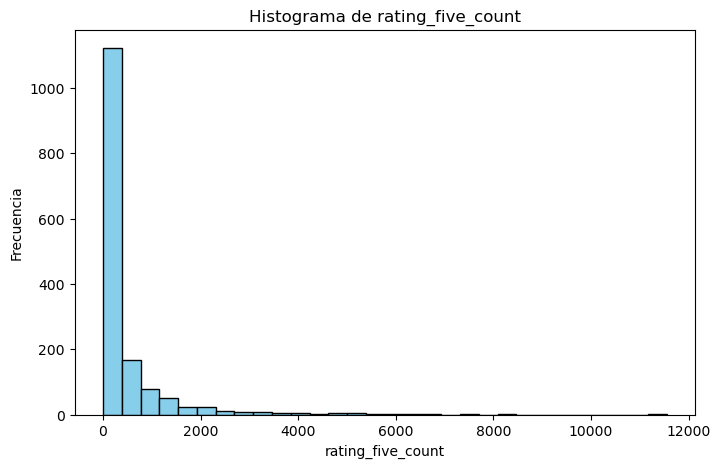

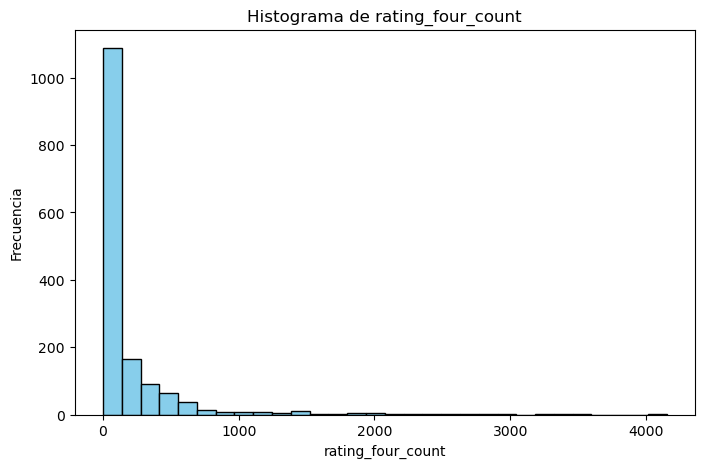

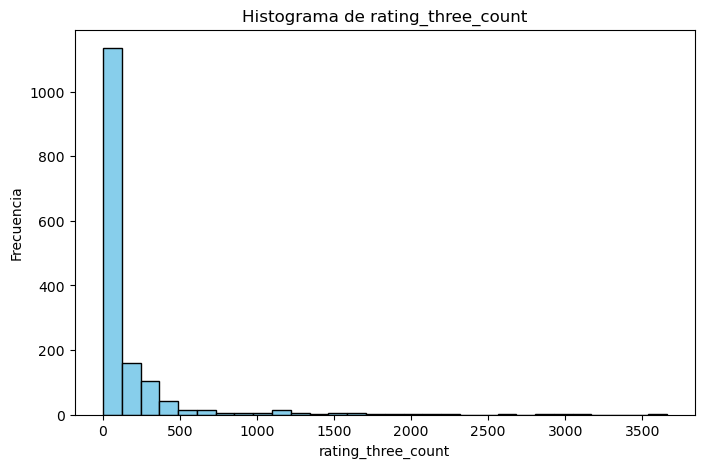

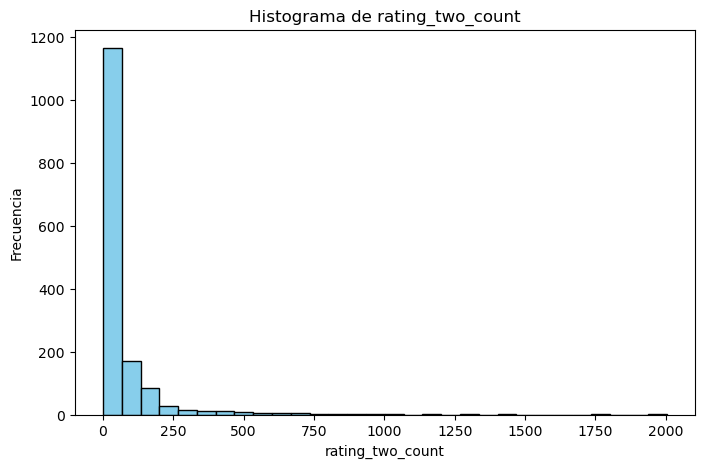

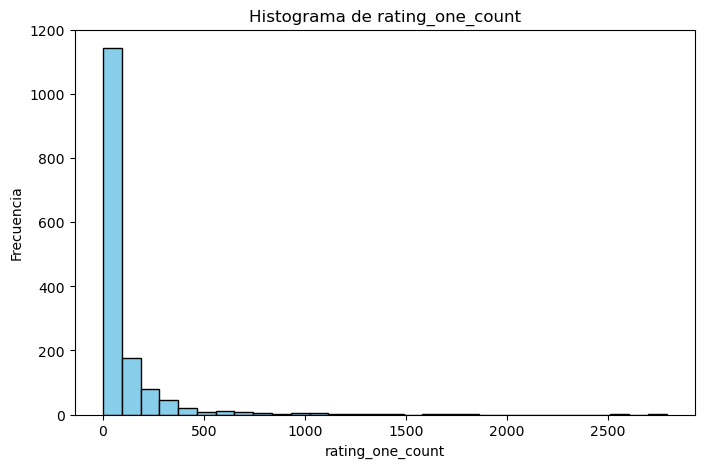

In [25]:
import matplotlib.pyplot as plt

# Lista de columnas para las que quieres hacer histogramas

# Crear un histograma separado para cada columna
for col in list(columnas_comunes_numero_nulos):
    plt.figure(figsize=(8, 5))
    plt.hist(data4[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [26]:
nulos

,var,perc_nulos
0,rating_five_count,2.860776
1,rating_four_count,2.860776
2,rating_three_count,2.860776
3,rating_two_count,2.860776
4,rating_one_count,2.860776
5,product_color,2.606484
6,product_variation_size_id,0.890019
7,origin_country,1.080737
8,merchant_name,0.254291
9,merchant_info_subtitle,18.690401


In [ ]:
# analisis numerico
# rating_five_count	2.860776
#1	rating_four_count	2.860776
#2	rating_three_count	2.860776
#3	rating_two_count	2.860776
#4	rating_one_count	2.860776
# todas son porcentaje bajo y asimétricas= imputación con mediana

In [ ]:
# analisis categórico
# product_color tiene porcentaje bajo, no categoria dominante= nueva categoria
# product_variation_size_id tiene porcentaje bajo,categoria dominante = imputar con moda
# origin_country tiene porcentaje bajo,categoria dominante = imputar con moda
# merchant_name tiene porcentaje bajo y no categpria dominante = nueva categoria
# merchant_info_subtitle tiene alto porcentaje y no categoria dominante se impota con la moda

In [28]:
# Categóricas - Moda

# 1. Calcular la moda


# ---------------- product_size ----------------------------

moda_product_size = data4['product_variation_size_id'].mode()[0] 
data4['product_variation_size_id'] = data4['product_variation_size_id'].fillna(moda_product_size)




# ---------------- country ----------------------------

moda_country = data4['origin_country'].mode()[0] 
data4['origin_country'] = data4['origin_country'].fillna(moda_country)



# ---------------- info_subtitle ----------------------------


info_subtitle = data4['merchant_info_subtitle'].mode()[0] 
data4['merchant_info_subtitle'] = data4['merchant_info_subtitle'].fillna(info_subtitle)



In [29]:
nulos = data4.isnull().sum()
nulos

title                           0
price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating_sold                     0
rating_count                    0
rating_five_count              45
rating_four_count              45
rating_three_count             45
rating_two_count               45
rating_one_count               45
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                  41
product_variation_size_id       0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  0
merchant_name                   4
merchant_info_subtitle          0
merchant_rating_count           0
merchant_id                     0
product_url                     0
product_id    

In [30]:
data4['product_color'] = data4['product_color'].fillna('Unknown')
data4['merchant_name'] = data4['merchant_name'].fillna('Unknown')

In [31]:
nulos = data4.isnull().sum()
nulos

title                           0
price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating_sold                     0
rating_count                    0
rating_five_count              45
rating_four_count              45
rating_three_count             45
rating_two_count               45
rating_one_count               45
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                   0
product_variation_size_id       0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  0
merchant_name                   0
merchant_info_subtitle          0
merchant_rating_count           0
merchant_id                     0
product_url                     0
product_id    

In [32]:
data4['product_color'].unique()


array(['white', 'green', 'red', 'black', 'leopardprint', 'blue', 'purple',
       'yellow', 'navyblue', 'beige', 'rosered', 'grey', 'claret',
       'lightblue', 'orange', 'pink', 'black & green', 'lightyellow',
       'Black', 'navy', 'winered', 'armygreen', 'khaki', 'Unknown',
       'red & blue', 'coffee', 'multicolor', 'blue & pink', 'floral',
       'RED', 'coolblack', 'white & green', 'navy blue', 'nude',
       'whitefloral', 'dustypink', 'skyblue', 'black & white',
       'fluorescentgreen', 'gray', 'orange & camouflage', 'camouflage',
       'brown', 'lightpink', 'pink & black', 'white & red', 'silver',
       'Army green', 'lightgreen', 'mintgreen', 'pink & grey', 'wine',
       'rose', 'light green', 'leopard', 'orange-red', 'gray & white',
       'White', 'Pink', 'watermelonred', 'Blue', 'star', 'white & black',
       'apricot', 'burgundy', 'wine red', 'pink & white', 'offwhite',
       'blackwhite', 'tan', 'lightred', 'black & blue', 'coralred',
       'lakeblue', 'darkbl

title                           0
price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating_sold                     0
rating_count                    0
rating_five_count              45
rating_four_count              45
rating_three_count             45
rating_two_count               45
rating_one_count               45
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                   0
product_variation_size_id       0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  0
merchant_name                   0
merchant_info_subtitle          0
merchant_rating_count           0
merchant_id                     0
product_url                     0
product_id    

In [34]:
nulos

title                           0
price                           0
retail_price                    0
units_sold                      0
uses_ad_boosts                  0
rating_sold                     0
rating_count                    0
rating_five_count              45
rating_four_count              45
rating_three_count             45
rating_two_count               45
rating_one_count               45
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
tags                            0
product_color                   0
product_variation_size_id       0
shipping_option_name            0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
origin_country                  0
merchant_name                   0
merchant_info_subtitle          0
merchant_rating_count           0
merchant_id                     0
product_url                     0
product_id    

In [37]:
# Numéricas - Mediana

# ---------------- five ----------------------------
mediana_five = float(data4['rating_five_count'].median())
data4['rating_five_count'] = data4['rating_five_count'].fillna(mediana_five)


# ---------------- four----------------------------

mediana_four = float(data4['rating_four_count'].median())
data4['rating_four_count'] = data4['rating_four_count'].fillna(mediana_four)

# ---------------- three----------------------------

mediana_three= float(data4['rating_three_count'].median())
data4['rating_three_count'] = data4['rating_three_count'].fillna(mediana_three)

# ---------------- two ----------------------------
mediana_two = float(data4['rating_two_count'].median())
data4['rating_two_count'] = data4['rating_two_count'].fillna(mediana_two)

# ---------------- one----------------------------
mediana_one = float(data4['rating_one_count'].median())
data4['rating_one_count'] = data4['rating_one_count'].fillna(mediana_one)

In [39]:
nulos = data4.isnull().sum()
nulos

title                          0
price                          0
retail_price                   0
units_sold                     0
uses_ad_boosts                 0
rating_sold                    0
rating_count                   0
rating_five_count              0
rating_four_count              0
rating_three_count             0
rating_two_count               0
rating_one_count               0
badge_local_product            0
badge_product_quality          0
badge_fast_shipping            0
tags                           0
product_color                  0
product_variation_size_id      0
shipping_option_name           0
shipping_option_price          0
shipping_is_express            0
countries_shipped_to           0
inventory_total                0
origin_country                 0
merchant_name                  0
merchant_info_subtitle         0
merchant_rating_count          0
merchant_id                    0
product_url                    0
product_id                     0
listed_pro

In [40]:
data4.to_csv('Merchant_ejercicios_apply.csv.csv', index=False)